<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/gasquality/CalorificValueNaturalGas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#@title Calculation of calorific value of natural gas
#@markdown Calculations based on ISO6976 for calculation of combustion properties of natural gas
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
%matplotlib inline

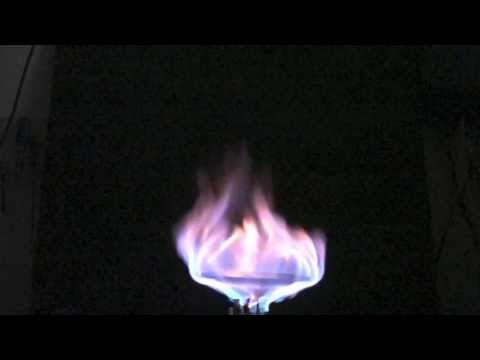

In [2]:
#@title Introduction to combustion of natural gas
#@markdown This video gives an intriduction to combustion of natural gas
from IPython.display import YouTubeVideo
YouTubeVideo('3zU6pfFq9V0', width=600, height=400)

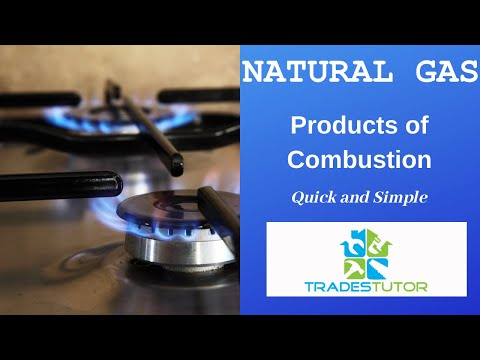

In [3]:
#@title Products of combustion
#@markdown This video gives an intriduction to combustion of natural gas and products formed
from IPython.display import YouTubeVideo
YouTubeVideo('IvnOR6h_Fn8', width=600, height=400)

In [8]:
#@title Calculation of combustion properties using ISO6976
#@markdown [ISO6976](https://www.sis.se/api/document/preview/920813/) defines an international accpeted method to calculate combustion properties of natural gas

from neqsim.thermo import fluid, TPflash
from neqsim.standards import ISO6976

nitrogen = 1.0 #@param {type:"number"}
CO2 = 0.0001 #@param {type:"number"}
methane = 88.3  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  1.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.25 #@param {type:"number"}
npentane =  0.25 #@param {type:"number"}
nhexane =  0.1 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addComponent("n-hexane", nhexane)

TPflash(fluid1)

referenceTemperatureVolume = "15.0" #@param ['0.0', '15.0', '20.0']
referenceTemperatureCombustion = 15.0 #@param ['0.0', '15.0', '20.0']
numberUnit = 'volume' #@param ['volume', 'mass', 'molar']

iso6976 = ISO6976(fluid1)
iso6976.setReferenceType(numberUnit)
iso6976.setVolRefT(float(referenceTemperatureVolume))
iso6976.setEnergyRefT(float(referenceTemperatureCombustion))
iso6976.calculate()

GCV = round(iso6976.getValue("SuperiorCalorificValue")/1.0e3,3)
WI = round(iso6976.getValue("SuperiorWobbeIndex")/1.0e3,3)
WIkwh = round(iso6976.getValue("SuperiorWobbeIndex")/1.0e3/3.6,3)
relDens = round(iso6976.getValue("RelativeDensity"),3)

print('GCV '+ str(GCV) + ' MJ/' +numberUnit)
print('WI '+ str(WI), ' MJ/' +numberUnit)
print('WI '+ str(WIkwh), ' kWh/' +numberUnit)
print('Relative density '+ str(relDens), ' [-]')


GCV 41.613 MJ/volume
WI 52.345  MJ/volume
WI 14.54  kWh/volume
Relative density 0.632  [-]
